In [41]:
import pandas as pd

df = pd.read_csv('text.csv')

In [42]:
df

,WORDNO,WORD
0,1,katekizmas
1,2,arba
2,3,mokslas
3,4,kiekvienam
4,5,krikščioniui
...,...,...
16575,16576,amžių
16576,16577,amžinų
16577,16578,","
16578,16579,amen


In [43]:
df2 = pd.read_csv('vocab.csv')

In [44]:
df2

,WORD,POS
0,***,***
1,",",-
2,-,-
3,.,-
4,?,-
...,...,...
3963,žymę,NaN
3964,žyminame,V
3965,žynauja,V
3966,žyvate,NaN


In [45]:
a = df.merge(df2, left_on='WORD', right_on='WORD', how='inner')

In [46]:
a

,WORDNO,WORD,POS
0,1,katekizmas,NaN
1,2,arba,KO
2,678,arba,KO
3,702,arba,KO
4,837,arba,KO
...,...,...,...
19417,16543,pataisyti,V
19418,16552,pildymo,NaN
19419,16556,atitraukti,V
19420,16562,didėsės?didesnės?,NaN


In [47]:
#a = a.dropna(axis=0)
#a

In [48]:
a = a.sort_values(by='WORDNO', ascending= True)
a.reset_index(drop = True, inplace = True)
a

,WORDNO,WORD,POS
0,1,katekizmas,NaN
1,2,arba,KO
2,3,mokslas,NaN
3,4,kiekvienam,PI
4,5,krikščioniui,NaN
...,...,...,...
19417,16576,amžių,NaN
19418,16577,amžinų,ADJ
19419,16578,",",-
19420,16579,amen,PTK


In [49]:
new = []
res = []
ind = []
for i,item in enumerate(a['POS'], start=0):
    new.append(item)
    value = i-1
    if new[value] == new[i]:
        res.append(item)
        ind.append(i)

In [50]:
new = a.loc[ind]
new

,WORDNO,WORD,POS
10,11,Ledesmą,NT
13,14,Jesu,-
14,15,.,-
24,25,Daukšą,NT
35,36,Ps,-
...,...,...,...
19280,16457,ramiai,ADV
19302,16477,galėčiau,V
19317,16487,stebuklingai,ADV
19324,16493,jeig,KO


In [51]:
lent = []
for i,item in enumerate(new['WORD'], start=0):
    lent.append(len(item))

In [52]:
new['LEN'] = lent

In [53]:
new

,WORDNO,WORD,POS,LEN
10,11,Ledesmą,NT,7
13,14,Jesu,-,4
14,15,.,-,1
24,25,Daukšą,NT,6
35,36,Ps,-,2
...,...,...,...,...
19280,16457,ramiai,ADV,6
19302,16477,galėčiau,V,8
19317,16487,stebuklingai,ADV,12
19324,16493,jeig,KO,4


In [54]:
new = new.groupby('POS').mean()[['LEN']]
new

/var/folders/8c/24x_n9m105b0glbhp5cl4y_w0000gn/T/ipykernel_51521/1329047404.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new = new.groupby('POS').mean()[['LEN']]


,LEN
POS,
-,2.124789
ADJ,7.850000
ADV,5.000000
AP,3.000000
CARD,8.500000
KO,3.120000
NT,6.412844
PD,4.500000
PI,5.000000


In [55]:
new.to_html('Results.html')

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

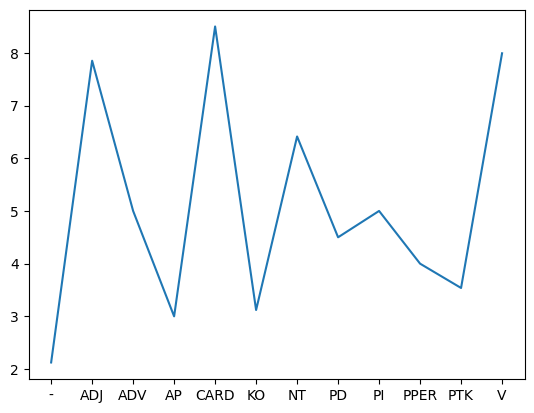

In [58]:
plt.plot(new)

In [59]:
plt.savefig('my_plot.png')

<Figure size 640x480 with 0 Axes>